<a href="https://colab.research.google.com/github/asadbek08/DataScienceMohirdev/blob/main/DL_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Deep Learning Model which identifies if the provided picture is car, plane or boat.***

In [1]:
import torch
import fastai

In [13]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 13.54 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [14]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [15]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated (h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0] [--image_IsGroupOf 1 or 0]
               [--image_IsDepiction 1 or 0] [--image_IsInside 1 or 0]
               [--multiclasses 0 (default) or 1] [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

options:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID dataset folder
  -y, --yes

In [16]:
!cd OIDv4_ToolKit && python main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 54425 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

# ***Model***

In [17]:
from fastai.vision.all import *
from ipywidgets import widgets

In [18]:
path = Path('train')
fls = get_image_files(path)
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 120MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.452084,0.453052,0.866667,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.473531,0.296361,0.908333,00:08
1,0.344190,0.348711,0.916667,00:09
2,0.250724,0.382045,0.908333,00:10
3,0.197416,0.374945,0.916667,00:08


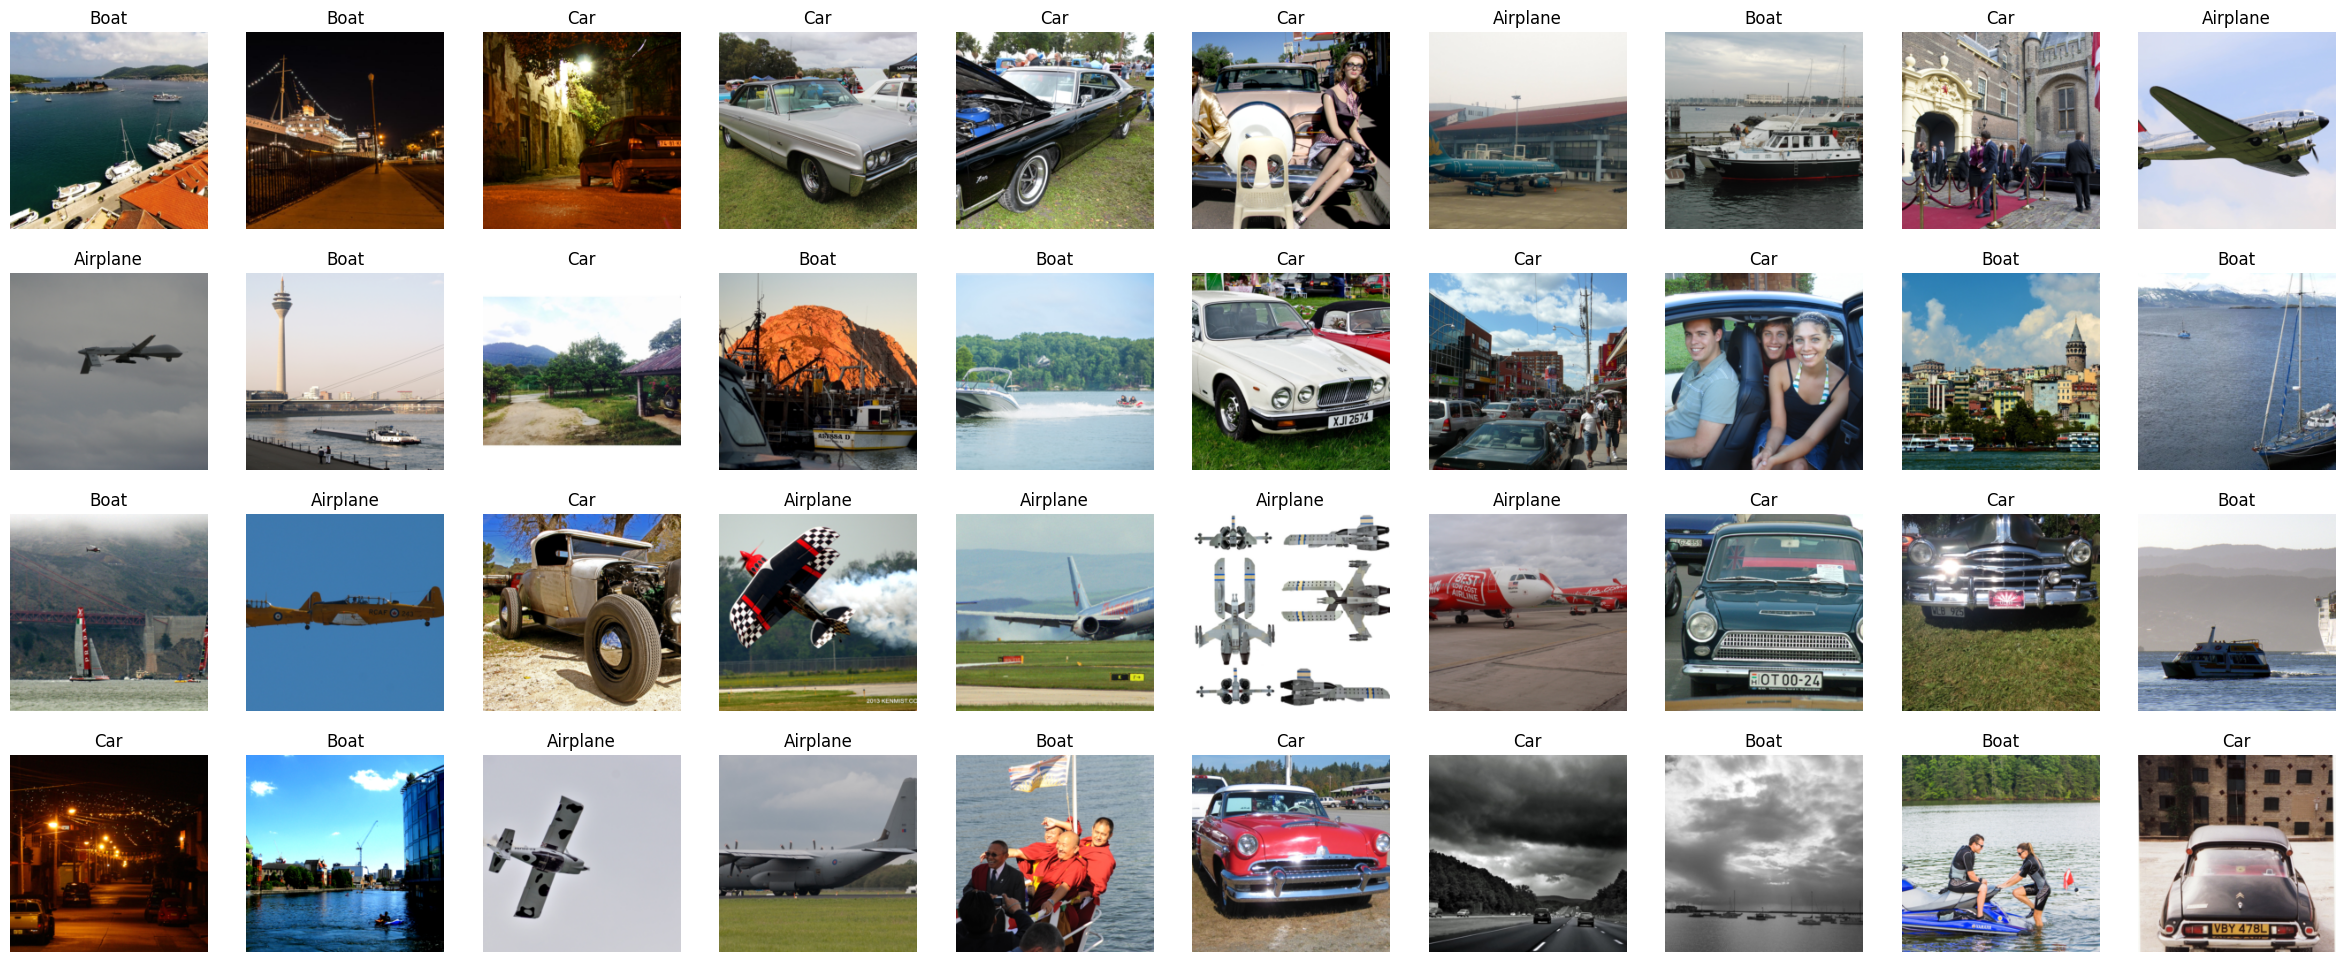

In [19]:
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=Resize(224)
)

dls = transports.dataloaders(path)
dls.train.show_batch(max_n=40, nrows=4)

learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

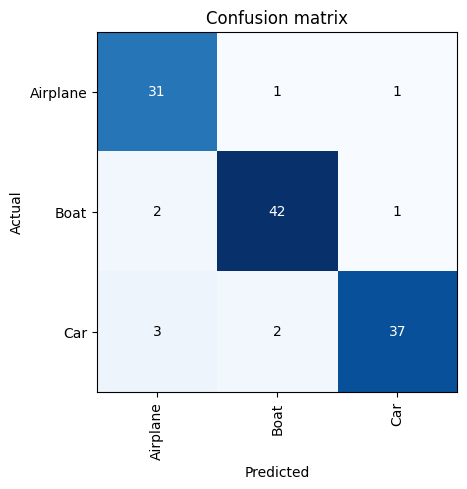

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [21]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Car tensor(8.0974e-07)


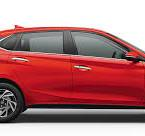

In [23]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(pred, probs[1])
img

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
%cd /content/


/content


In [29]:
!zip -r dataset.zip train/

  adding: train/ (stored 0%)
  adding: train/Car/ (stored 0%)
  adding: train/Car/725a419ddc08e8e0.jpg (deflated 0%)
  adding: train/Car/a6bb470967ef08d3.jpg (deflated 0%)
  adding: train/Car/6c04b81b01e62da6.jpg (deflated 0%)
  adding: train/Car/bb4f80d498c26f6e.jpg (deflated 1%)
  adding: train/Car/704d5bad82c6b966.jpg (deflated 0%)
  adding: train/Car/ce5a03dd480c7d39.jpg (deflated 0%)
  adding: train/Car/27b5ebe03ce74e04.jpg (deflated 1%)
  adding: train/Car/972f04a9dc825efb.jpg (deflated 0%)
  adding: train/Car/0729afecded06cf9.jpg (deflated 0%)
  adding: train/Car/37ab77028e3b3272.jpg (deflated 1%)
  adding: train/Car/fce5435e6804bf39.jpg (deflated 0%)
  adding: train/Car/9831b8a39398a4a5.jpg (deflated 0%)
  adding: train/Car/cf17b85cd66e6bdc.jpg (deflated 0%)
  adding: train/Car/cd0bdf97164cd597.jpg (deflated 0%)
  adding: train/Car/c02778ad75d81839.jpg (deflated 0%)
  adding: train/Car/43fe8518d2bbe333.jpg (deflated 0%)
  adding: train/Car/a14bd7b3c7d753de.jpg (deflated 0%)
  a

In [30]:
from google.colab import files
files.download('dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>